# Actividad 1: M2003B
Author: A. Ramirez-Morales (andres.ramirez@tec.mx)

## Instrucciones:
- Complete las funciones donde vea líneas de código inconclusas
- Use comentarios para documentar de manera integral sus funciones
- Pruebe sus funciones con distintos parámetros
- Aumente las explicaciones en el Markdown y en el código
- Procure NO usar chatGPT ú otra tecnología similar, usted tiene la capacidad intelectual suficiente para resolverlo por usted mismo
- Use la documentación oficial de las librerías que se utilizan
- Se entrega un archivo PDF CANVAS como lo indique el profesor


In [1]:
# cargar librerías básicas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro
import pandas as pd

## 0. Introducción

### 0.1. Simulación del experimento de lanzamientos de dado
*Ejercicio:* 
- Definir el número de eventos a simular
- Definir el tipo de dado
- Simular los datos con una distribución adecuada

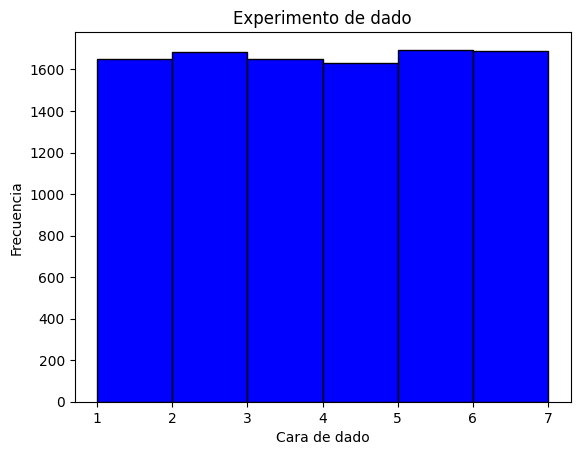

In [4]:
n = 10000  # num de eventos
data = np.random.uniform(low=1, high=7, size=n)  # simulacion con dado de 6 caras
bins = np.arange(1, 8)  # limites

# aqui graficamos
plt.hist(data, bins=bins, color='blue', edgecolor='black')
plt.title("Experimento de dado")
plt.xlabel("Cara de dado")
plt.ylabel("Frecuencia")
plt.show()

### 0.2. Distribuciones Gaussianas (normales)
*Ejercicio:* 
- Escriba código para generar una distribución Gaussiana. Explique los parámetros de dicha función de probabilidad.
- Repita esta actividad para la distribución de Poisson y Bernoilli


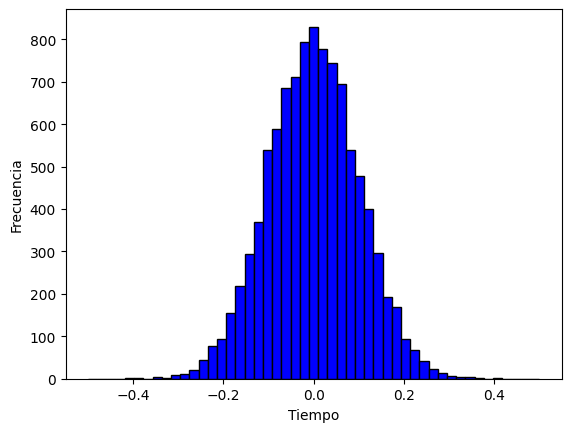

In [19]:
# from https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html

n = 10000
mu, sigma = 0, 0.1 # mean and std
data = np.random.normal(mu, sigma, n)
bins = np.linspace(-0.5, 0.5, 50)

# aqui graficamos
plt.hist(data, bins=bins, color='blue', edgecolor='black')
plt.title("")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.show()

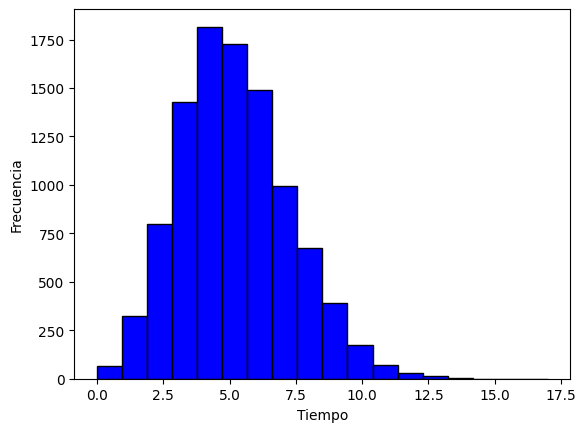

In [33]:
n = 10000
data = np.random.poisson(lam=5, size=n)
bins = np.linspace(0, 17, 19) 

# aqui graficamos
plt.hist(data, bins=bins, color='blue', edgecolor='black')
plt.title("")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.show()

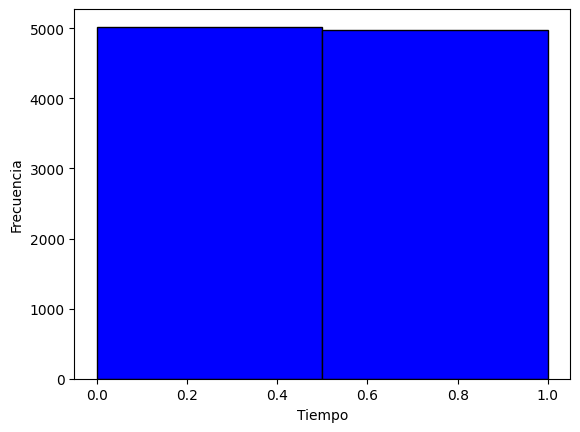

In [46]:
n = 10000
p = 0.5
data = np.random.binomial(1, p, n) # n = 1 es bernoulli


# aqui graficamos
plt.hist(data, bins=2, color='blue', edgecolor='black')
plt.title("")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.show()

### 0.3. Crear, guardar y cargar datos
*Ejercicio:* 
- Crear, guardar y cargar dichos datos
- Asegúrese que los datos coinciden con lo que espera
- Siga los "leads" en el código siguiente

In [47]:
n = 1000
mu, sigma = 0, 0.1 # mean and std
data = np.random.normal(mu, sigma, n)

# aqui creamos un pandas data frame para guardar los datos
df = pd.DataFrame({
        'data': data,
    })

# guardamos los datos en un archivo CSV
nombre_archivo = "datos_gaussianos.csv"
df.to_csv(nombre_archivo, index=False)
print(f"datos guardados en {nombre_archivo}")

# ahora cargamos los datos
datos_cargados = pd.read_csv("datos_gaussianos.csv")

datos guardados en datos_gaussianos.csv


### Ahora grafiquemos los datos
Compruebe que los datos están de acuerdo con lo que esperabamos. Para lo anterior, calculemos la media y la desviación estándar usando funciones de numpy y a mano. Compare sus respuestas.



In [51]:
data.mean()

np.float64(0.0005829902076888182)

In [52]:
data.std()

np.float64(0.09990007779847984)

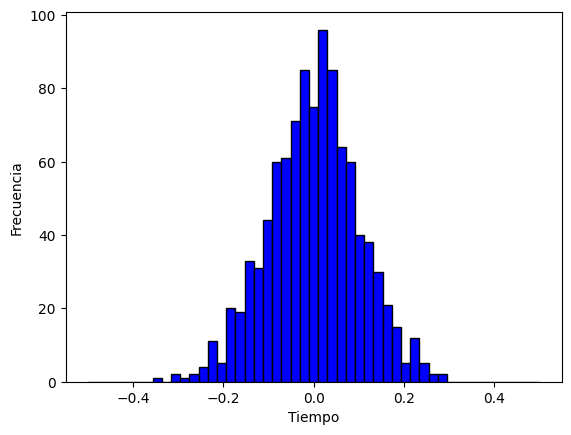

In [54]:
bins = np.linspace(-0.5, 0.5, 50)

plt.hist(data, bins=bins, color='blue', edgecolor='black')
plt.title("")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.show()

### 0.4 Probabilidad (densidad) multivariada
- Genere datos en dos dimensiones distribuidos siguiendo una probabilidad Gaussiana
- Grafique los datos usando un histograma en dos dimensiones
- Guarde los datos en un archivo csv
- Cargue los datos y grafique cada una de las variables en un histograma sencillo
- Realizar un ajuste para encontrar la PDF analítica y graficar

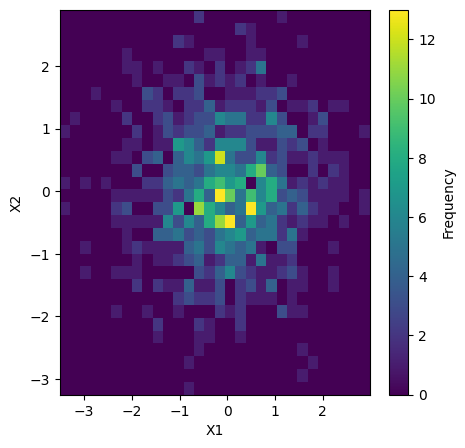

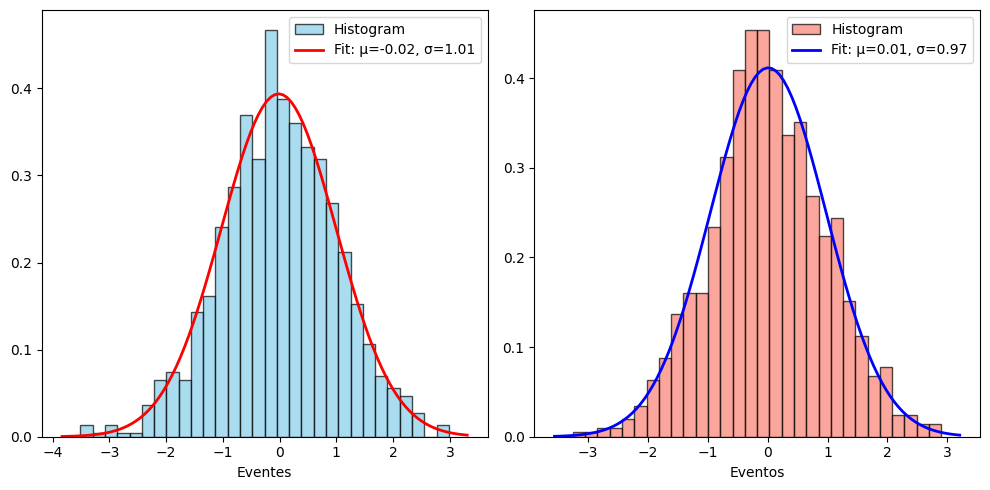

In [ ]:
# generar los datos
# [Sugerencia: use np.random.multivariate_normal()]

n = 1000
mean = [0, 0]
cov = [[1, 0], [0, 1]] # como sale en la documentacion
data = np.random.multivariate_normal(mean, cov, n)

# aqui graficamos
plt.figure(figsize=(5, 5))
plt.hist2d(data[:, 0], data[:, 1], bins=30, cmap='viridis')
plt.colorbar(label='Frequency')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# guardar datos
df = pd.DataFrame(data, columns=['X1', 'X2'])
df.to_csv('gaussian_2d_data.csv', index=False)

# cargar datos
# inserte código aqui
df_cargado = pd.read_csv('gaussian_2d_data.csv')


# graficar
plt.figure(figsize=(10, 5))

# First variable histogram and fit
plt.subplot(1, 2, 1)
x1 = df_cargado['X1']
# hacer el fit [Sugerencia: usar norm.fit() ]
mu, std = norm.fit(x1)
plt.hist(x1, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, 
         label='Histogram')

# graficar el ajuste
xmin, xmax = plt.xlim()
x_fit = np.linspace(xmin, xmax, 100)
y_fit = norm.pdf(x_fit, mu, std)
plt.plot(x_fit, y_fit, 'r-', linewidth=2, label=f'Fit: μ={mu:.2f}, σ={std:.2f}')
plt.xlabel('Eventes')
plt.legend()

# mismos comentarios que para x1
plt.subplot(1, 2, 2)
x2 = df_cargado['X2']
mu, std = norm.fit(x2)
plt.hist(x2, bins=30, density=True, color='salmon', edgecolor='black', alpha=0.7,
         label='Histogram')

# graficar el ajuste 
ymin, ymax = plt.xlim()
y_fit = np.linspace(ymin, ymax, 100)
y_pdf = norm.pdf(y_fit, mu, std)
plt.plot(y_fit, y_pdf, 'b-', linewidth=2, label=f'Fit: μ={mu:.2f}, σ={std:.2f}')
plt.xlabel('Eventos')
plt.legend()

plt.tight_layout()
plt.show()

## 1. Teorema del límite central

### 1.1 Distribuciones Gaussianas
**Ejercicio:** Muestre numéricamente que la combinación lineal de distribuciones Gaussianas es una distribución Gaussiana. Asegúrese de que esta nueva distribución en efecto sea Gaussiana con una prueba de Shapiro-Wilk, es decir encuentre un p-valor a aceptar que es Gaussiana.


In [ ]:
def sum_gaussians_tlc(num_samples=10000, n_gaussians=3):
    """

    
    """
    # Generate independent Gaussian distributions
    means = np.random.uniform(-2.0, 2.0, size=n_gaussians)
    std_devs = np.random.uniform(0.5, 2.0, size=n_gaussians)
    coefficients = np.random.uniform(-2.0, 2.0, size=n_gaussians)
    # Initialize an empty list to store the samples
    gaussians = []

    # Loop through each Gaussian distribution
    for i in range(n_gaussians):
        # Generate samples for the current Gaussian distribution
        samples = np.random.normal(loc=means[i], scale=std_devs[i], size=num_samples)
        # Add the generated samples to the list
        gaussians.append(samples)

    # Linear combination of these Gaussians
    linear_combination = np.zeros(num_samples) # inicializar con ceros
    for i in range(n_gaussians):
        linear_combination = linear_combination + coefficients[i] * gaussians[i]

    # Fit a Gaussian (normal) distribution to the linear combination
    mu, std = norm.fit(linear_combination)

    # Plot the histogram of the linear combination
    plt.figure(figsize=(8, 6))
    count, bins, _ = plt.hist(linear_combination, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black', label='Linear Combination')

    # Plot the Gaussian fit
    xmin, xmax = plt.xlim()  # Get the limits of the x-axis for plotting the fit over the same range
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)  # Gaussian distribution fit

    # Scale the fit by the max height of the histogram to make it align
    plt.plot(x, p, 'k', linewidth=2, label=f'Gaussian mean={mu:.2f}, std={std:.2f}')

    # Perform the Shapiro-Wilk test for normality
    stat, p_value = shapiro(linear_combination)

    # Display the p-value on the plot
    plt.text(xmin + (xmax - xmin) * 0.05, max(count) * 0.9, f'p-value: {p_value:.5f}', fontsize=12, color='red')

    # Add labels, title, and legend
    plt.title(f'Linear Combination of {n_gaussians} Gaussian Distributions\nSample Size: {num_samples}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()

    # Print the p-value
    if p_value > 0.05:
        print(f"Los datos siguen una distribución normal (p-value > 0.05)")
    else:
        print(f"Los datos NO siguen una distribución normal (p-value <= 0.05)")

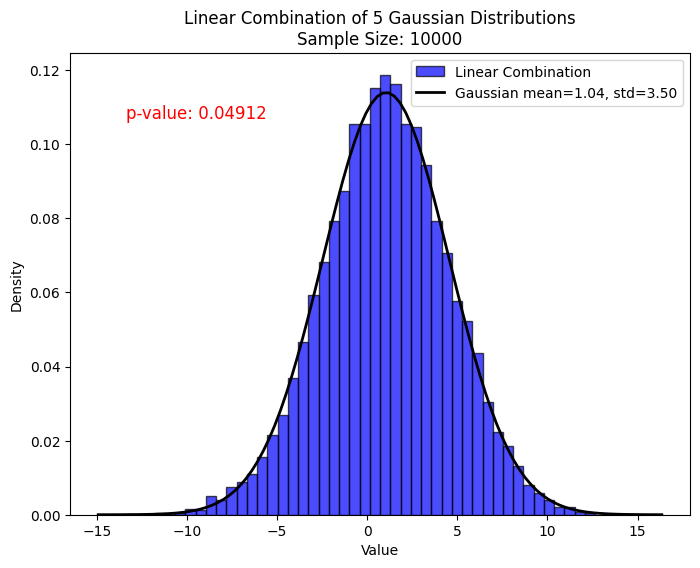

Los datos NO siguen una distribución normal (p-value <= 0.05)


In [76]:
# Ejecute su código
sum_gaussians_tlc(num_samples=10000, n_gaussians=5)

### 1.2 Distribuciones uniformes

**Ejercicio**: Repita el ejercicio anterior con distribuciones uniformes finitas. Es decir, el teorema establece que la distribución de
la combinación lineal de un gran número de variables aleatorias independientes e idénticamente distribuidas se aproximará a una distribución normal. Sume cuando menos 50 distribuciones.

In [79]:
def sum_uniforms_tlc(num_samples=1000000, n_uniforms=100):
    """

    
    """
    # Generate independent uniform distributions
    lower_bounds = np.full(n_uniforms, 0)
    upper_bounds = np.full(n_uniforms, 1)
    coefficients = np.ones(n_uniforms)

    uniforms = []

    # Loop through each uniform distribution
    for i in range(n_uniforms):
        # Generate random samples for the current uniform distribution
        current_samples = np.random.uniform(lower_bounds[i], upper_bounds[i], size=num_samples)
        # Append the generated samples to the list
        uniforms.append(current_samples)
    
    # Linear combination of these uniforms
    linear_combination = np.zeros(num_samples)
    for i in range(n_uniforms):
        linear_combination = linear_combination + coefficients[i] * uniforms[i]

    # Fit a Gaussian (normal) distribution to the linear combination
    mu, std = norm.fit(linear_combination)

    # Plot the histogram of the linear combination
    plt.figure(figsize=(8, 6))
    count, bins, _ = plt.hist(linear_combination, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black', label='Linear Combination')

    # Plot the Gaussian fit
    xmin, xmax = plt.xlim()  # Get the limits of the x-axis for plotting the fit over the same range
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    # Scale the fit by the max height of the histogram to make it align
    plt.plot(x, p, 'k', linewidth=2, label=f'Gaussian mu={mu:.2f}, sigma={std:.2f}')

    # Perform the Shapiro-Wilk test for normality
    stat, p_value = shapiro(linear_combination)

    # Display the p-value on the plot
    plt.text(xmin + (xmax - xmin) * 0.05, max(count) * 0.9, f'p-value: {p_value:.5f}', fontsize=12, color='red')

    # Add labels, title, and legend
    plt.title(f'Linear Combination of {n_uniforms} Uniform Distributions\nSample Size: {num_samples}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()

    # Print the p-value
    if p_value > 0.05:
        print(f"Los datos siguen una distribución normal (p-value > 0.05)")
    else:
        print(f"Los datos NO siguen una distribución normal (p-value <= 0.05)")


/opt/anaconda3/envs/mv-tec/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1000000.
  res = hypotest_fun_out(*samples, **kwds)


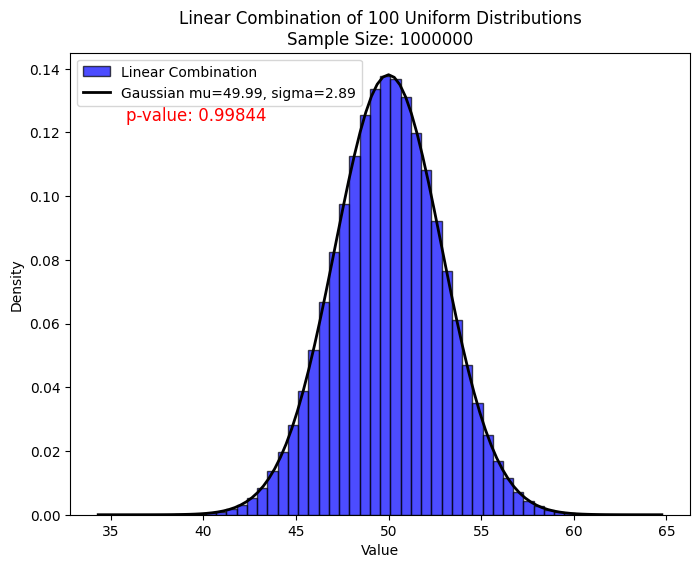

Los datos siguen una distribución normal (p-value > 0.05)


In [80]:
sum_uniforms_tlc(num_samples=1000000, n_uniforms=100)